In [2]:
from platform import python_version
python_version()

'3.6.13'

In [3]:
import os
os.getcwd()

'c:\\Users\\ankit19.gupta\\Desktop\\Self Projects\\1. Deep Learning in Medical Science'

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the image sizes to this size
IMAGE_SIZE=[224,224]

In [6]:
train_path='Datasets/train'
validation_path='Datasets/test'

In [7]:
## add processing layers to the front of vgg16
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [8]:
## don't train the weights because we are already using the trained weights from imagenet algo above
for layer in vgg.layers:
    layer.trainable=False

In [9]:
## find the number of classes based on the number of folders in train folder i.e. normal and pneumonia using glob function
folders=glob('Datasets/train/*')

In [10]:
folders

['Datasets/train\\NORMAL', 'Datasets/train\\PNEUMONIA']

In [11]:
## in vgg() models, we have used include_top=False because we are not using the top layer for classification
## because we have already done in folders variable

In [12]:
x=Flatten()(vgg.output)

In [13]:
## you can add more layers if you want as:
#x=Dense(1000,activation='relu')(x)

In [14]:
## adding final layer
prediction=Dense(len(folders),activation='softmax')(x)

In [15]:
## create a model object
model=Model(inputs=vgg.input,outputs=prediction)

In [16]:
## view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
## tell the model which optimization method to use and what is the cost for this
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
## to retrieve images from test/train folders, we use imagedatagenerator
from keras_preprocessing.image import ImageDataGenerator

In [19]:
## to create additional images with respect to train dataset 
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [20]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
training_set=train_datagen.flow_from_directory('Datasets/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [22]:
test_set=train_datagen.flow_from_directory('Datasets/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 624 images belonging to 2 classes.


In [23]:
## fit the model
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

c:\Users\ankit19.gupta\.conda\envs\Self_Projects\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 685s 4s/step - loss: 0.2305 - accuracy: 0.9158 - val_loss: 0.2720 - val_accuracy: 0.9119
Epoch 2/5
163/163 [==============================] - 697s 4s/step - loss: 0.1393 - accuracy: 0.9459 - val_loss: 0.3933 - val_accuracy: 0.8750
Epoch 3/5
163/163 [==============================] - 685s 4s/step - loss: 0.0937 - accuracy: 0.9659 - val_loss: 0.3104 - val_accuracy: 0.8958
Epoch 4/5
163/163 [==============================] - 687s 4s/step - loss: 0.0926 - accuracy: 0.9680 - val_loss: 0.3308 - val_accuracy: 0.9022
Epoch 5/5
163/163 [==============================] - 770s 5s/step - loss: 0.0733 - accuracy: 0.9722 - val_loss: 0.3659 - val_accuracy: 0.8894


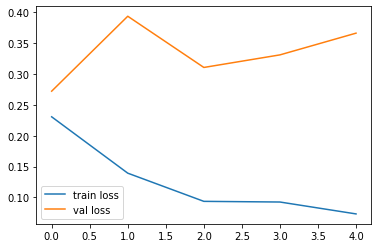

<Figure size 432x288 with 0 Axes>

In [31]:
## loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

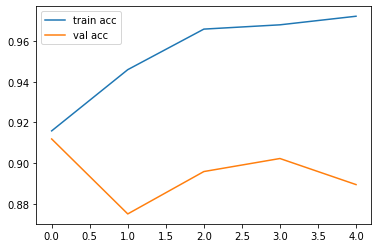

<Figure size 432x288 with 0 Axes>

In [30]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

## Prediction by the Model

In [36]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [39]:
## load the previously saved model
model = load_model('model_vgg16.h5')

In [40]:
img = image.load_img('Datasets/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(224, 224))

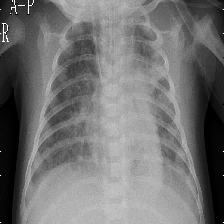

In [41]:
img

In [42]:
x = image.img_to_array(img)

In [43]:
x

array([[[ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.],
        ...,
        [ 13.,  13.,  13.],
        [ 11.,  11.,  11.],
        [ 12.,  12.,  12.]],

       [[ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 18.,  18.,  18.],
        ...,
        [ 16.,  16.,  16.],
        [ 18.,  18.,  18.],
        [ 19.,  19.,  19.]],

       [[ 16.,  16.,  16.],
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.],
        ...,
        [ 23.,  23.,  23.],
        [ 19.,  19.,  19.],
        [ 16.,  16.,  16.]],

       ...,

       [[  5.,   5.,   5.],
        [  1.,   1.,   1.],
        [  6.,   6.,   6.],
        ...,
        [  2.,   2.,   2.],
        [  1.,   1.,   1.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [ 43.,  43.,  43.],
        [  6.,   6.,   6.],
        ...,
        [  2.,   2.,   2.],
        [ 27.,  27.,  27.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  5.,   5.,   5.],
        [  6.,  

In [46]:
x = np.expand_dims(x, axis=0)

In [47]:
x

array([[[[ 16.,  16.,  16.],
         [ 19.,  19.,  19.],
         [ 20.,  20.,  20.],
         ...,
         [ 13.,  13.,  13.],
         [ 11.,  11.,  11.],
         [ 12.,  12.,  12.]],

        [[ 16.,  16.,  16.],
         [ 19.,  19.,  19.],
         [ 18.,  18.,  18.],
         ...,
         [ 16.,  16.,  16.],
         [ 18.,  18.,  18.],
         [ 19.,  19.,  19.]],

        [[ 16.,  16.,  16.],
         [ 19.,  19.,  19.],
         [ 20.,  20.,  20.],
         ...,
         [ 23.,  23.,  23.],
         [ 19.,  19.,  19.],
         [ 16.,  16.,  16.]],

        ...,

        [[  5.,   5.,   5.],
         [  1.,   1.,   1.],
         [  6.,   6.,   6.],
         ...,
         [  2.,   2.,   2.],
         [  1.,   1.,   1.],
         [  0.,   0.,   0.]],

        [[255., 255., 255.],
         [ 43.,  43.,  43.],
         [  6.,   6.,   6.],
         ...,
         [  2.,   2.,   2.],
         [ 27.,  27.,  27.],
         [255., 255., 255.]],

        [[  0.,   0.,   0.],
       

In [48]:
img_data = preprocess_input(x)

In [49]:
img_data

array([[[[ -87.939   , -100.779   , -107.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -83.939   ,  -96.779   , -103.68    ],
         ...,
         [ -90.939   , -103.779   , -110.68    ],
         [ -92.939   , -105.779   , -112.68    ],
         [ -91.939   , -104.779   , -111.68    ]],

        [[ -87.939   , -100.779   , -107.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -85.939   ,  -98.779   , -105.68    ],
         ...,
         [ -87.939   , -100.779   , -107.68    ],
         [ -85.939   ,  -98.779   , -105.68    ],
         [ -84.939   ,  -97.779   , -104.68    ]],

        [[ -87.939   , -100.779   , -107.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -83.939   ,  -96.779   , -103.68    ],
         ...,
         [ -80.939   ,  -93.779   , -100.68    ],
         [ -84.939   ,  -97.779   , -104.68    ],
         [ -87.939   , -100.779   , -107.68    ]],

        ...,

        [[ -98.939   , -111.779   , -1

In [50]:
classes = model.predict(img_data)

In [51]:
# 0 means normal and 1 means pneumonia and it shows the probability of having normal chest xray scan (i.e. not pneumonia) and
## having pneumonia 
classes

array([[0., 1.]], dtype=float32)

In [56]:
## check for normal 
img = image.load_img('Datasets/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [57]:
## 4.644 IS VERLY LOW VALUE AND 1.OOO IS VERY HIGH VALUE FOR PROBABILITY BETWEEN O AND 1
classes

array([[1.000000e+00, 4.644664e-11]], dtype=float32)